<a href="https://colab.research.google.com/github/parkyw2/keggle/blob/main/Bike_Sharing_in_Washington_DC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
from fbprophet.plot import plot_plotly
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import *
from fbprophet import Prophet
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/My\ Drive/회사 데이터

/content/drive/My Drive/회사 데이터


In [ ]:
df = pd.read_csv('day.csv')

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df = df[['dteday', 'cnt', 'temp']].dropna()

In [ ]:
df['date_index'] = df['dteday']

In [ ]:
df['date_index'] = pd.to_datetime(df['date_index'])
df = df.set_index('date_index')

In [ ]:
df.head()

,dteday,cnt,temp
date_index,,,
2011-01-01,2011-01-01,985,0.344167
2011-01-02,2011-01-02,801,0.363478
2011-01-03,2011-01-03,1349,0.196364
2011-01-04,2011-01-04,1562,0.200000
2011-01-05,2011-01-05,1600,0.226957


In [ ]:
df.columns=['ds','y','temp']

In [ ]:
df.head()

,ds,y,temp
date_index,,,
2011-01-01,2011-01-01,985,0.344167
2011-01-02,2011-01-02,801,0.363478
2011-01-03,2011-01-03,1349,0.196364
2011-01-04,2011-01-04,1562,0.200000
2011-01-05,2011-01-05,1600,0.226957


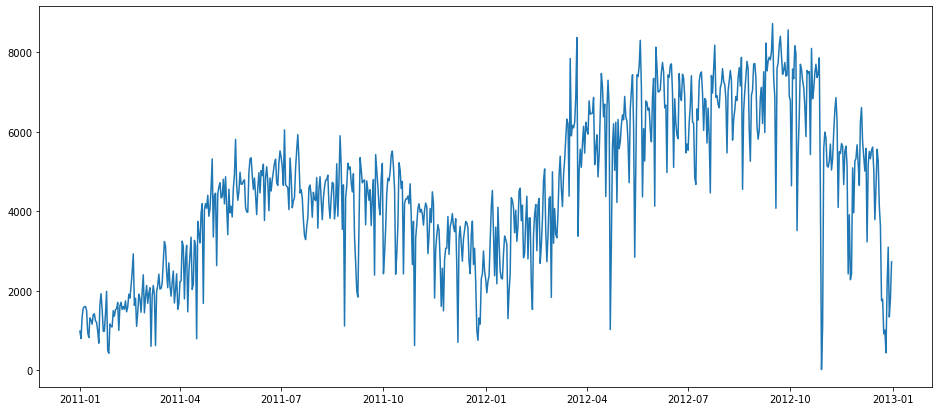

In [ ]:
plt.figure(figsize = (16, 7))
plt.plot(df.index,df.y)
plt.show()

In [ ]:
m=Prophet(interval_width=0.8,yearly_seasonality=True)
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future=m.make_future_dataframe(periods=50,include_history=True)

In [ ]:
forecast=m.predict(future)
preds= forecast['yhat'][:-50]

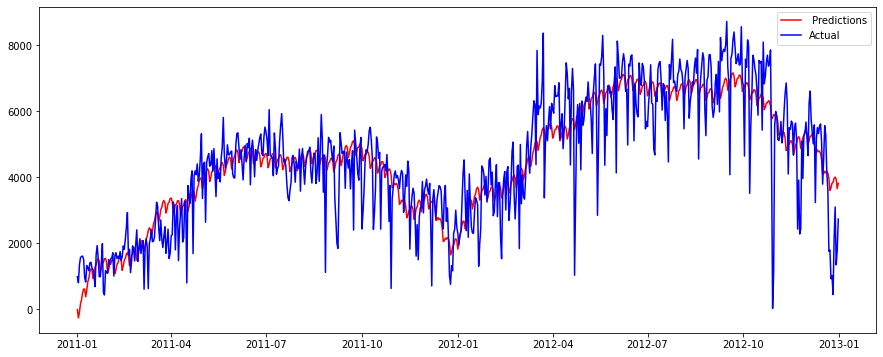

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(df.index,preds,color='red',label=' Predictions')
plt.plot(df.index,df.y,color='blue',label='Actual')
plt.legend()
plt.show()

In [ ]:
r2 = round(r2_score(df["y"], preds), 3)
mse = round(mean_squared_error(df["y"], preds), 3)
mae = round(mean_absolute_error(df["y"], preds), 3)
print("R2: ", r2)
print("MSE: ", mse)
print("MAE: ", mae)

R2:  0.746
MSE:  953227.025
MAE:  703.863


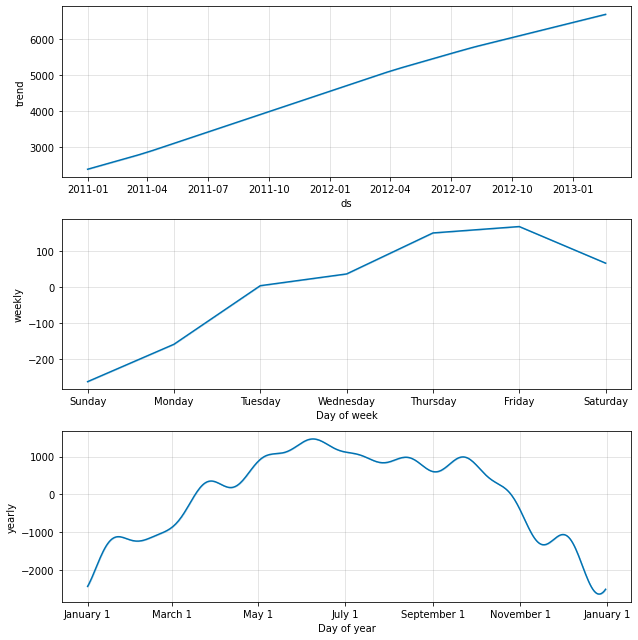

In [ ]:
fig = m.plot_components(forecast)

Adding Regressor

In [ ]:
future_range = pd.date_range('2013-01-01', periods=10, freq='D')
future_temp_df = pd.DataFrame({ 'future_date': future_range, 'future_temp' : 0})
future_temp_df['future_date'] = pd.to_datetime(future_temp_df['future_date'])
future_temp_df = future_temp_df.set_index('future_date')

In [ ]:
future_temp_df.at['2013-01-01', 'future_temp'] = 0.319148
future_temp_df.at['2013-01-02', 'future_temp'] = 0.255319
future_temp_df.at['2013-01-03', 'future_temp'] = 0.234042
future_temp_df.at['2013-01-04', 'future_temp'] = 0.319148
future_temp_df.at['2013-01-05', 'future_temp'] = 0.340425
future_temp_df.at['2013-01-06', 'future_temp'] = 0.404255
future_temp_df.at['2013-01-07', 'future_temp'] = 0.361702
future_temp_df.at['2013-01-08', 'future_temp'] = 0.404255
future_temp_df.at['2013-01-09', 'future_temp'] = 0.425531
future_temp_df.at['2013-01-10', 'future_temp'] = 0.446808

In [ ]:
future_temp_df.tail(10)

,future_temp
future_date,
2013-01-01,0.319148
2013-01-02,0.255319
2013-01-03,0.234042
2013-01-04,0.319148
2013-01-05,0.340425
2013-01-06,0.404255
2013-01-07,0.361702
2013-01-08,0.404255
2013-01-09,0.425531


In [ ]:
def weather_temp(ds):
    date = (pd.to_datetime(ds)).date()  
    if df[date:].empty:
        return future_temp_df[date:]['future_temp'].values[0]
    else:
        return (df[date:]['temp']).values[0]    
    return 0

In [ ]:
df.columns=['ds','y','temp']
m = Prophet()
m.add_regressor('temp')
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=10)
future['temp'] = future['ds'].apply(weather_temp)

In [ ]:
forecast=m.predict(future)

In [ ]:
preds= forecast['yhat'][:-10]

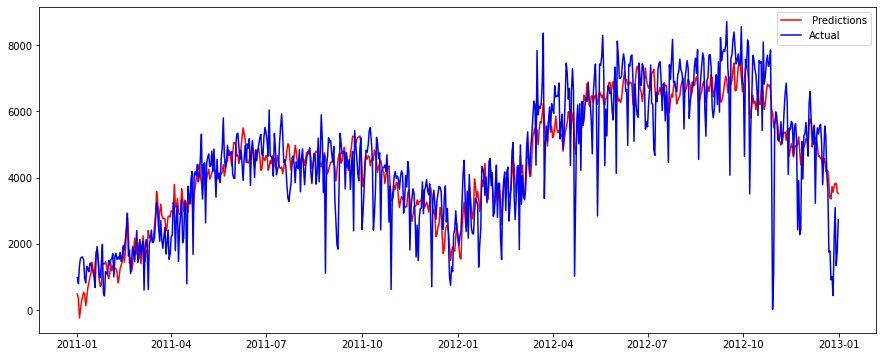

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(df.index,preds,color='red',label=' Predictions')
plt.plot(df.index,df.y,color='blue',label='Actual')
plt.legend()
plt.show()

In [ ]:
r2 = round(r2_score(df["y"], preds), 3)
mse = round(mean_squared_error(df["y"], preds), 3)
mae = round(mean_absolute_error(df["y"], preds), 3)
print("R2: ", r2)
print("MSE: ", mse)
print("MAE: ", mae)

R2:  0.767
MSE:  872663.138
MAE:  683.748


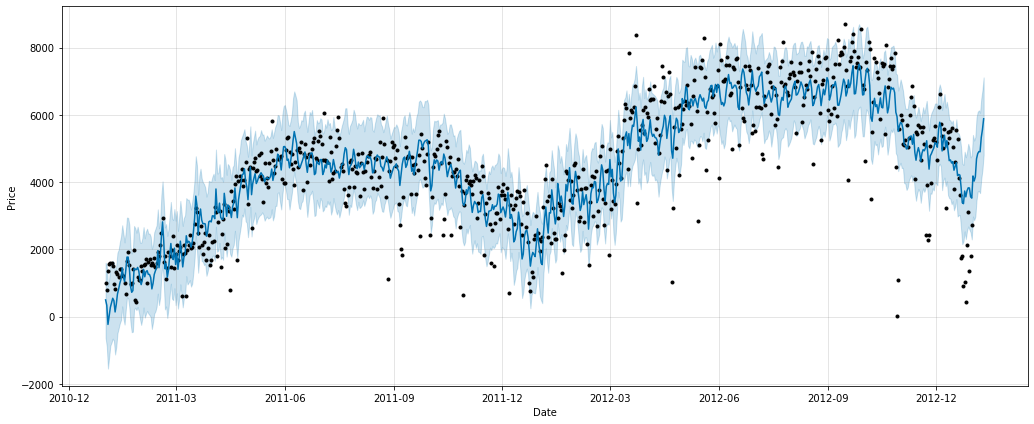

In [ ]:
forecast=m.predict(future)
preds= forecast['yhat']
figure=m.plot(forecast,xlabel='Date',ylabel='Price')
figure.set_size_inches(15,6)

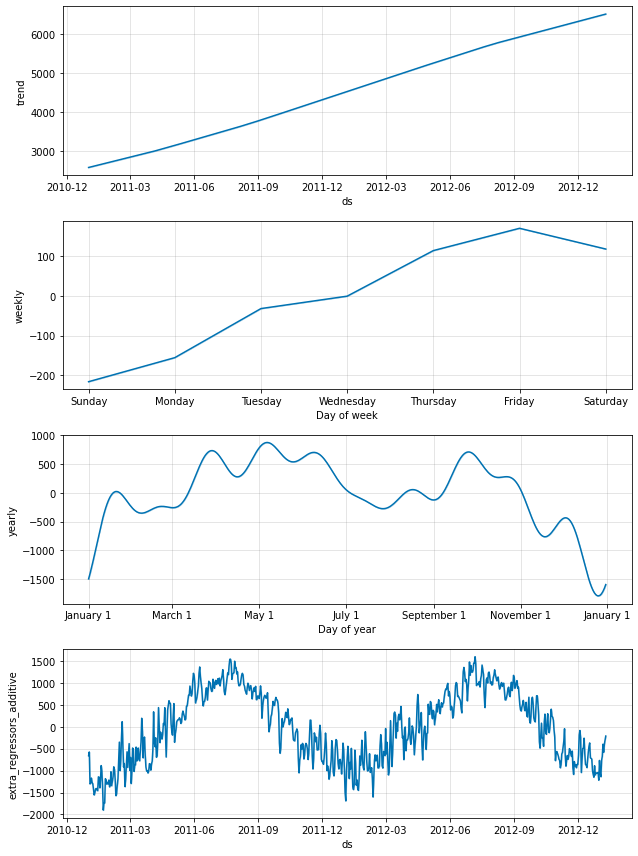

In [ ]:
fig = m.plot_components(forecast)

Adding Multiple Regressor

In [ ]:
df=pd.read_csv("day.csv")
df = df[['dteday', 'cnt', 'temp','weathersit']].dropna()

In [ ]:
df['date_index'] = df['dteday']
df['date_index'] = pd.to_datetime(df['date_index'])
df = df.set_index('date_index')


In [ ]:
df.columns=['ds','y','temp','weathersit']

In [ ]:
df.head()

,ds,y,temp,weathersit
date_index,,,,
2011-01-01,2011-01-01,985,0.344167,2
2011-01-02,2011-01-02,801,0.363478,2
2011-01-03,2011-01-03,1349,0.196364,1
2011-01-04,2011-01-04,1562,0.200000,1
2011-01-05,2011-01-05,1600,0.226957,1


In [ ]:
def weather_temp(ds):
    date = (pd.to_datetime(ds)).date()
    
    if df[date:].empty:
        return future_temp_df[date:]['future_temp'].values[0]
    else:
        return (df[date:]['temp']).values[0]
    
    return 0

def weather_condition(ds):
    date = (pd.to_datetime(ds)).date()
    
    if df[date:].empty:
        return future_temp_df[date:]['future_weathersit'].values[0]
    else:
        return (df[date:]['weathersit']).values[0]
    
    return 0

In [ ]:
future_range = pd.date_range('2013-01-01', periods=10, freq='D')
future_temp_df = pd.DataFrame({ 'future_date': future_range, 'future_temp' : 0, 'future_weathersit': 0})

future_temp_df['future_date'] = pd.to_datetime(future_temp_df['future_date'])
future_temp_df = future_temp_df.set_index('future_date')

future_temp_df.at['2013-01-01', 'future_temp'] = 0.319148
future_temp_df.at['2013-01-02', 'future_temp'] = 0.255319
future_temp_df.at['2013-01-03', 'future_temp'] = 0.234042
future_temp_df.at['2013-01-04', 'future_temp'] = 0.319148
future_temp_df.at['2013-01-05', 'future_temp'] = 0.340425
future_temp_df.at['2013-01-06', 'future_temp'] = 0.404255
future_temp_df.at['2013-01-07', 'future_temp'] = 0.361702
future_temp_df.at['2013-01-08', 'future_temp'] = 0.404255
future_temp_df.at['2013-01-09', 'future_temp'] = 0.425531
future_temp_df.at['2013-01-10', 'future_temp'] = 0.446808

future_temp_df.at['2013-01-01', 'future_weathersit'] = 4
future_temp_df.at['2013-01-02', 'future_weathersit'] = 4
future_temp_df.at['2013-01-03', 'future_weathersit'] = 4
future_temp_df.at['2013-01-04', 'future_weathersit'] = 4
future_temp_df.at['2013-01-05', 'future_weathersit'] = 4
future_temp_df.at['2013-01-06', 'future_weathersit'] = 4
future_temp_df.at['2013-01-07', 'future_weathersit'] = 4
future_temp_df.at['2013-01-08', 'future_weathersit'] = 4
future_temp_df.at['2013-01-09', 'future_weathersit'] = 4
future_temp_df.at['2013-01-10', 'future_weathersit'] = 4

In [ ]:
m = Prophet()
m.add_regressor('temp')
m.add_regressor('weathersit')
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=10)
future['temp'] = future['ds'].apply(weather_temp)
future['weathersit'] = future['ds'].apply(weather_condition)

In [ ]:
forecast=m.predict(future)
preds= forecast['yhat'][:-10]

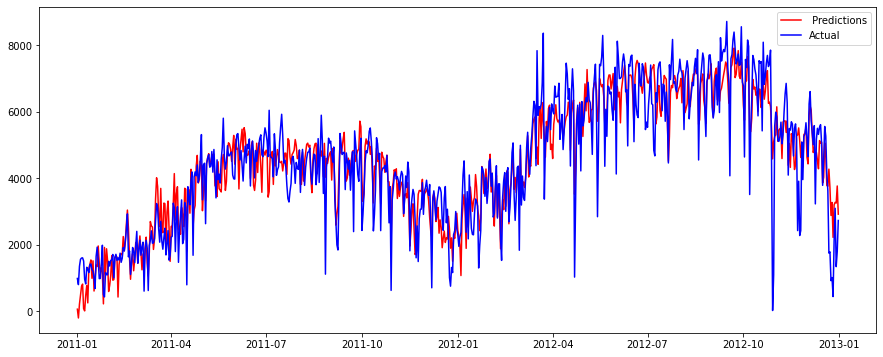

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(df.index,preds,color='red',label=' Predictions')
plt.plot(df.index,df.y,color='blue',label='Actual')
plt.legend()
plt.show()

In [ ]:
r2 = round(r2_score(df["y"], preds), 3)
mse = round(mean_squared_error(df["y"], preds), 3)
mae = round(mean_absolute_error(df["y"], preds), 3)
print("R2: ", r2)
print("MSE: ", mse)
print("MAE: ", mae)

R2:  0.827
MSE:  649722.074
MAE:  584.902


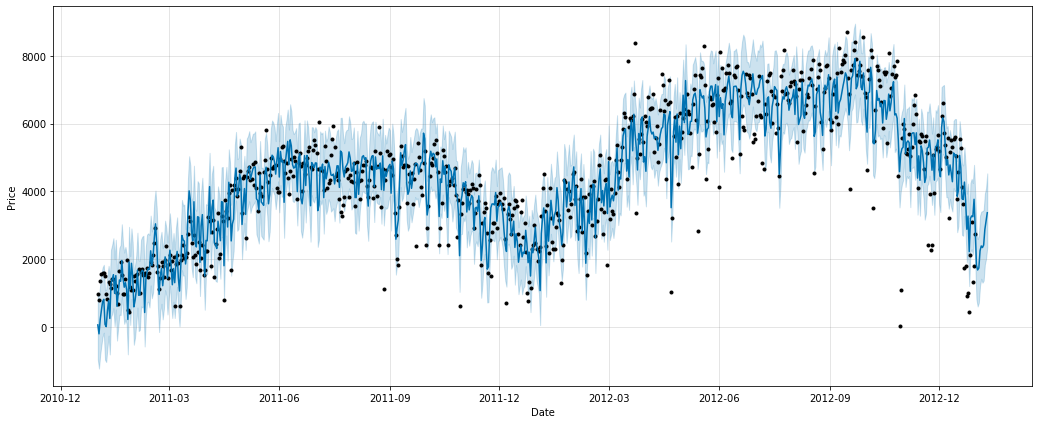

In [ ]:
forecast=m.predict(future)
preds= forecast['yhat']
figure=m.plot(forecast,xlabel='Date',ylabel='Price')
figure.set_size_inches(15,6)

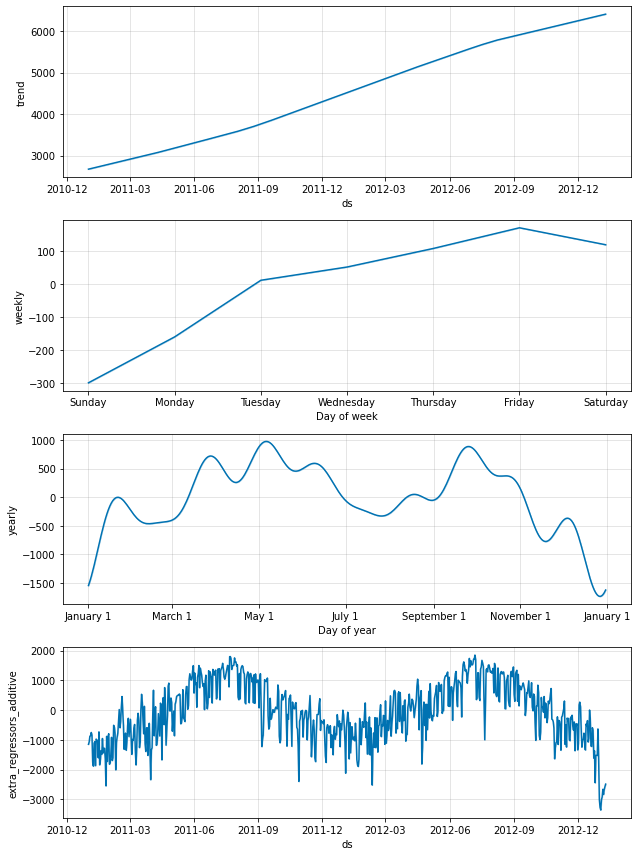

In [ ]:
fig = m.plot_components(forecast)